# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
#Type your code here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV



# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
#Type your code here
file_path = 'retail_dataset_clustered.csv'
df = pd.read_csv(file_path)
print(df.head())
print(df.info())


   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  cluster  Age_original  \
0         3              50           150        0          34.0   
1         2             500          1000        2          26.0   
2         1              30            30        1          50.0   
3         1             500           500        2          37.0   
4         2              50           100        0          30.0   

   Price_per_Unit_original  Total_Amount_original  
0                     50.0                  150.0  
1                    500.0          

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
#Type your code here
# Pisahkan fitur (X) dan target (y)
X = df[['Age_original', 'Price_per_Unit_original', 'Total_Amount_original']]  # Fitur
y = df['cluster']  # Target (label cluster)

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Tampilkan ukuran data latih dan data uji
print(f"Ukuran data latih: {X_train.shape}")
print(f"Ukuran data uji: {X_test.shape}")

Ukuran data latih: (800, 3)
Ukuran data uji: (200, 3)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Narasi:
Random Forest algoritma ensemble yang menggunakan banyak decision tree untuk membuat prediksi.
Algoritma ini bekerja dengan menggabungkan hasil dari beberapa pohon keputusan untuk meningkatkan akurasi dan mengurangi overfitting.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 0.99
F1-Score: 0.99


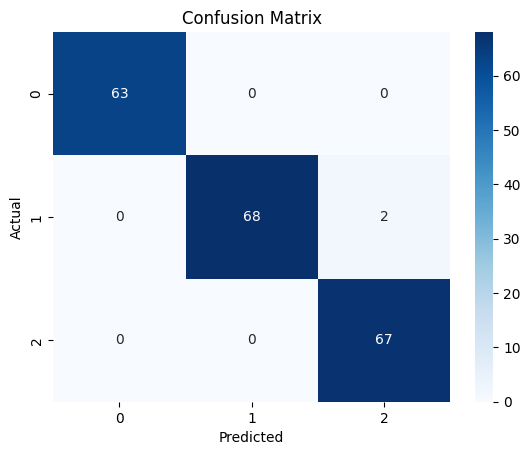

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      0.97      0.99        70
           2       0.97      1.00      0.99        67

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [5]:
#Type your code here
# Prediksi menggunakan data uji
y_pred = model_rf.predict(X_test)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [6]:
#Type your code here
# Definisikan parameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Lakukan GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Tampilkan hyperparameter terbaik
print(f"Best Parameters: {grid_search.best_params_}")

# Gunakan model terbaik
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy setelah tuning: 0.99
F1-Score setelah tuning: 0.99


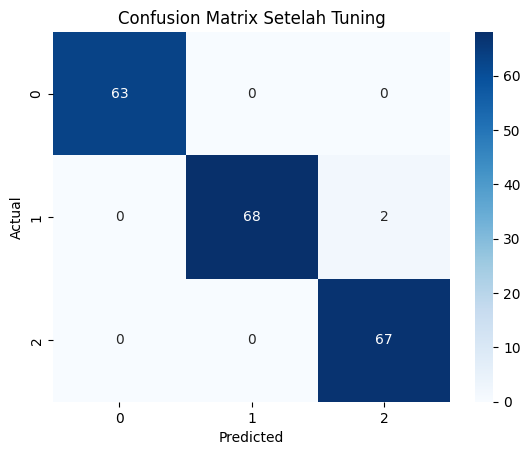

Classification Report Setelah Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      0.97      0.99        70
           2       0.97      1.00      0.99        67

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [7]:
#Type your code here

# Definisikan parameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Lakukan GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Tampilkan hyperparameter terbaik
print(f"Best Parameters: {grid_search.best_params_}")

# Gunakan model terbaik
best_model = grid_search.best_estimator_

# Prediksi ulang menggunakan model terbaik
y_pred_best = best_model.predict(X_test)

# Hitung metrik evaluasi
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print(f"Accuracy setelah tuning: {accuracy_best:.2f}")
print(f"F1-Score setelah tuning: {f1_best:.2f}")

# Confusion Matrix setelah tuning
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title('Confusion Matrix Setelah Tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report setelah tuning
print("Classification Report Setelah Tuning:")
print(classification_report(y_test, y_pred_best))

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Analisis Sebelum dan Setelah Tuning
- Bandingkan metrik evaluasi (Accuracy, F1-Score) sebelum dan setelah tuning.
- Periksa apakah ada peningkatan performa model setelah tuning.
2. Identifikasi Kelemahan Model
- Apakah Precision atau Recall rendah untuk kelas tertentu?
- Apakah model mengalami overfitting atau underfitting?
3. Rekomendasi Tindakan Lanjutan
- Jika hasil belum memuaskan, pertimbangkan untuk:
  - Mengumpulkan lebih banyak data.
  - Mencoba algoritma lain seperti Logistic Regression, Decision Tree, atau K-Nearest Neighbors (KNN).
  - Melakukan feature engineering untuk meningkatkan kualitas fitur.
